In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [200]:
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)
data['Side'] = data['Side'].replace('L',0)
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','Side','pred mort','LOS']]
X = X.dropna(axis=0)
X1 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','Side','pred mort']]
y1 = X[['LOS']]
X1

,Age,Sex,BMI,GX AT VO2 (mL/kg/min),GX AT VE/VCO2,GX VO2 Max VO2 (mL/kg/min),GX VO2 Max VO2/Pred (%),GX VO2 Max VO2/HR (mL/beat),GX Predicted VO2/HR (mL/beat),GX Work Max Work (Watts),GX Predicted Work (Watts),PF Pre FEV1/FVC (%),Side,pred mort
0,66.0,1.0,26.0,7.4,39.0,9.8,31.0,8.0,15.0,30.0,175.0,57.0,0.0,1.42
1,68.0,1.0,24.0,15.3,29.0,24.8,79.0,17.0,16.0,111.0,177.0,80.0,0.0,1.00
2,77.0,0.0,25.0,8.2,47.0,9.2,47.0,7.0,9.0,117.0,76.0,71.0,1.0,3.00
3,81.0,0.0,24.0,7.5,24.0,15.5,87.0,7.0,8.0,59.0,57.0,80.0,0.0,2.00
4,69.0,0.0,34.0,6.5,32.0,11.4,77.0,8.0,9.0,59.0,65.0,63.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,88.0,0.0,24.0,13.5,35.0,16.6,115.0,6.0,6.0,57.0,33.0,0.0,1.0,3.35
246,74.0,0.0,22.0,12.2,36.0,17.4,78.0,7.0,9.0,61.0,80.0,66.0,0.0,0.50
247,66.0,1.0,33.0,19.8,30.0,19.8,92.0,15.0,14.0,122.0,140.0,82.0,0.0,1.00
248,80.0,1.0,23.0,12.5,32.0,18.1,76.0,12.0,13.0,96.0,120.0,70.0,1.0,5.00


In [5]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(166, 14)
(166, 1)
(56, 14)
(56, 1)


In [6]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X1_train,y1_train)

LinearRegression()

In [199]:
predict_y1 = lg.predict(X1_test)
from sklearn.model_selection import cross_val_score
scores = (cross_val_score(lg,X1_train,y1_train, scoring='r2', cv=5))
np.mean(scores)

-0.1857383073509536

In [9]:
true_y1 = np.array(y1_test).reshape(-1)
predict_y1 = np.array(predict_y1).reshape(-1)

In [12]:
from sklearn.metrics import r2_score

In [71]:
y1_score = (r2_score(true_y1,predict_y1))
y1_test.shape[0]
n = np.arange(y1_test.shape[0])
y1_score

-0.020626199274606183

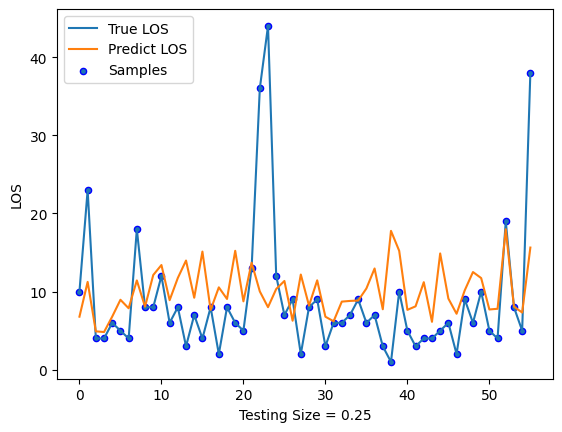

In [100]:
plt.plot(n,true_y1,label='True LOS')
plt.plot(n,predict_y1,label='Predict LOS')
plt.scatter(n,true_y1,edgecolor="b", s=20, label="Samples")
plt.xlabel("Testing Size = 0.25")
plt.ylabel("LOS")
plt.legend(loc='best');

In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1,test_size=0.4,random_state=1)

In [23]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(133, 14)
(133, 1)
(89, 14)
(89, 1)


In [25]:
lg1 = LinearRegression()
lg1.fit(X2_train,y2_train)

LinearRegression()

In [26]:
predict_y2 = lg.predict(X2_test)
true_y2 = np.array(y2_test).reshape(-1)
predict_y2 = np.array(predict_y2).reshape(-1)

In [27]:
r2_score(true_y2,predict_y2)

-0.04699049309583958

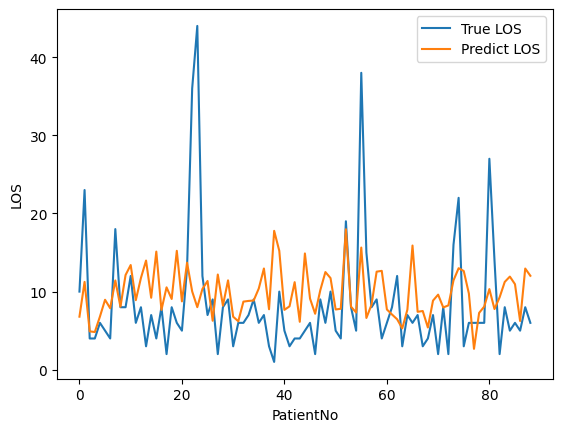

In [28]:
plt.plot(true_y2,label='True LOS')
plt.plot(predict_y2,label='Predict LOS')
plt.xlabel("PatientNo")
plt.ylabel("LOS")
plt.legend();

In [29]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1,test_size=0.1,random_state=1)

In [30]:
print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(199, 14)
(199, 1)
(23, 14)
(23, 1)


In [31]:
lg2 = LinearRegression()
lg2.fit(X3_train,y3_train)

LinearRegression()

In [32]:
predict_y3 = lg.predict(X3_test)
true_y3 = np.array(y3_test).reshape(-1)
predict_y3 = np.array(predict_y3).reshape(-1)
r2_score(true_y3,predict_y3)

-0.06107442700040955

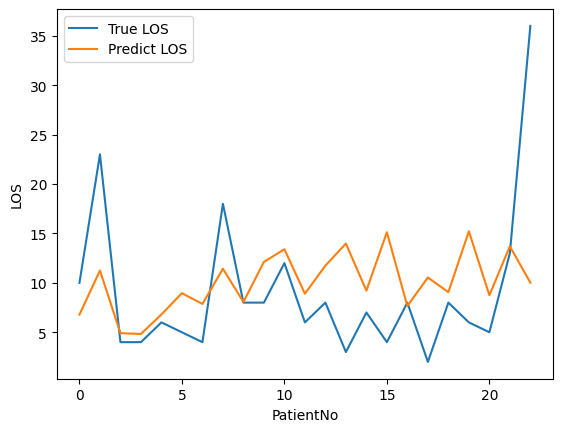

In [33]:
plt.plot(true_y3,label='True LOS')
plt.plot(predict_y3,label='Predict LOS')
plt.xlabel("PatientNo")
plt.ylabel("LOS")
plt.legend();

In [34]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X1, y1,test_size=0.5,random_state=1)

In [35]:
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)

(111, 14)
(111, 1)
(111, 14)
(111, 1)


In [36]:
lg3 = LinearRegression()
lg3.fit(X4_train,y4_train)

LinearRegression()

In [53]:
predict_y4 = lg.predict(X4_test)
true_y4 = np.array(y4_test).reshape(-1)
predict_y4 = np.array(predict_y4).reshape(-1)
print(r2_score(true_y4,predict_y4))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(true_y4,predict_y4))

-0.008768284720547914
4.859757405387719


In [38]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X1, y1,test_size=0.6,random_state=1)

In [39]:
print(X5_train.shape)
print(y5_train.shape)
print(X5_test.shape)
print(y5_test.shape)

(88, 14)
(88, 1)
(134, 14)
(134, 1)


In [40]:
lg4 = LinearRegression()
lg4.fit(X5_train,y5_train)

LinearRegression()

In [41]:
predict_y5 = lg.predict(X5_test)
true_y5 = np.array(y5_test).reshape(-1)
predict_y5 = np.array(predict_y5).reshape(-1)
r2_score(true_y5,predict_y5)

-0.0018178314018841846

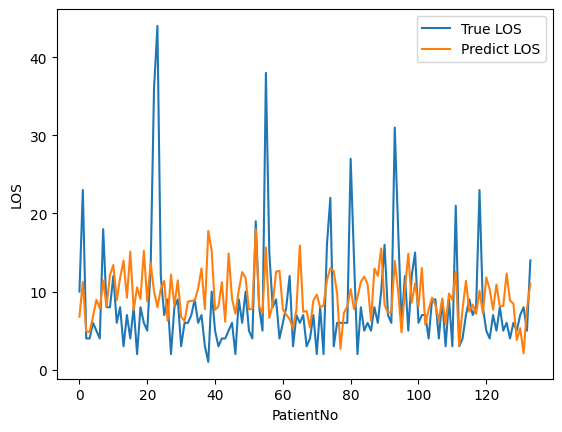

In [42]:
plt.plot(true_y5,label='True LOS')
plt.plot(predict_y5,label='Predict LOS')
plt.xlabel("PatientNo")
plt.ylabel("LOS")
plt.legend();

In [43]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X1, y1,test_size=0.7,random_state=1)

In [44]:
print(X6_train.shape)
print(y6_train.shape)
print(X6_test.shape)
print(y6_test.shape)

(66, 14)
(66, 1)
(156, 14)
(156, 1)


In [46]:
lg5 = LinearRegression()
lg5.fit(X6_train,y6_train)

LinearRegression()

In [47]:
predict_y6 = lg.predict(X6_test)
true_y6 = np.array(y6_test).reshape(-1)
predict_y6 = np.array(predict_y6).reshape(-1)
r2_score(true_y6,predict_y6)

0.005767405877010856

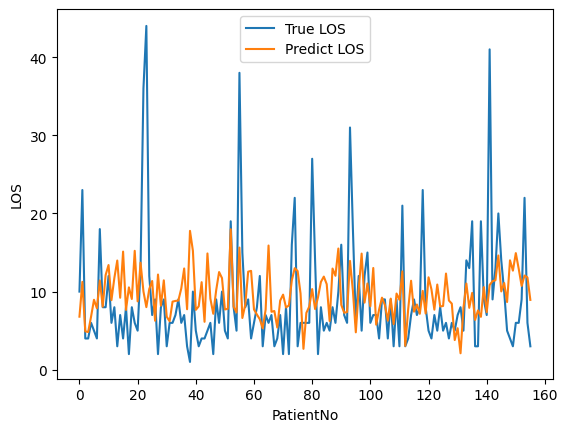

In [48]:
plt.plot(true_y6,label='True LOS')
plt.plot(predict_y6,label='Predict LOS')
plt.xlabel("PatientNo")
plt.ylabel("LOS")
plt.legend();

In [49]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X1, y1,test_size=0.8,random_state=1)

In [50]:
lg6 = LinearRegression()
lg6.fit(X7_train,y7_train)

LinearRegression()

In [51]:
predict_y7 = lg.predict(X7_test)
true_y7 = np.array(y7_test).reshape(-1)
predict_y7 = np.array(predict_y7).reshape(-1)
r2_score(true_y7,predict_y7)

0.01945111160104218

In [80]:
y1_score = (r2_score(true_y1,predict_y1)) #0.25
y2_score = (r2_score(true_y2,predict_y2)) #0.4
y3_score = (r2_score(true_y3,predict_y3)) #0.1
y4_score = (r2_score(true_y4,predict_y4)) 
y5_score = (r2_score(true_y5,predict_y5))
y6_score = (r2_score(true_y6,predict_y6))
y7_score = (r2_score(true_y7,predict_y7))
data_set = np.array([[0.1,0.25,0.4,0.5,0.6,0.7,0.8]])
score = np.array([[y3_score,y1_score,y2_score,y4_score,y5_score,y6_score,y7_score]])

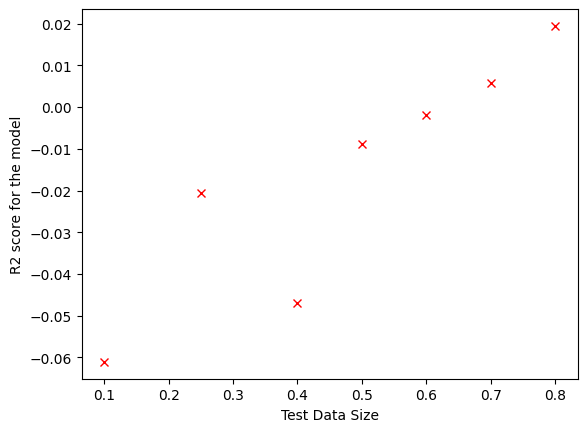

In [81]:
plt.plot(data_set,score,'rx')
plt.xlabel("Test Data Size")
plt.ylabel("R2 score for the model");

In [90]:
from sklearn.metrics import mean_absolute_error
y1_mae = (mean_absolute_error(true_y1,predict_y1)) #0.25
y2_mae = (mean_absolute_error(true_y2,predict_y2)) #0.4
y3_mae = (mean_absolute_error(true_y3,predict_y3)) #0.1
y4_mae = (mean_absolute_error(true_y4,predict_y4)) 
y5_mae = (mean_absolute_error(true_y5,predict_y5))
y6_mae = (mean_absolute_error(true_y6,predict_y6))
y7_mae = (mean_absolute_error(true_y7,predict_y7))
data_set = np.array([[0.1,0.25,0.4,0.5,0.6,0.7,0.8]])
mae = np.array([[y3_mae,y1_mae,y2_mae,y4_mae,y5_mae,y6_mae,y7_mae]])

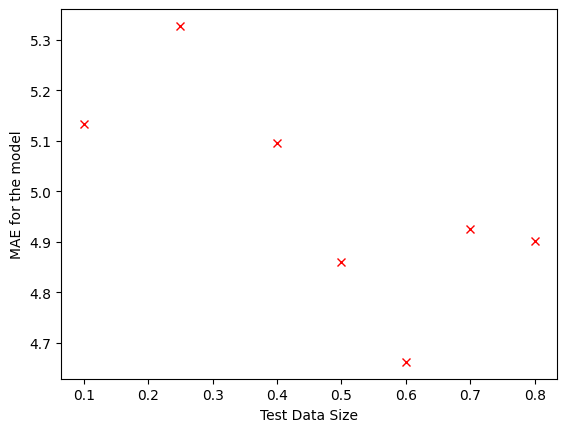

In [91]:
plt.plot(data_set,mae,'rx')
plt.xlabel("Test Data Size")
plt.ylabel("MAE for the model");

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
y1_mse = (mean_squared_error(true_y1,predict_y1)) #0.25
y2_mse = (mean_squared_error(true_y2,predict_y2)) #0.4
y3_mse = (mean_squared_error(true_y3,predict_y3)) #0.1
y4_mse = (mean_squared_error(true_y4,predict_y4)) 
y5_mse = (mean_squared_error(true_y5,predict_y5))
y6_mse = (mean_squared_error(true_y6,predict_y6))
y7_mse = (mean_squared_error(true_y7,predict_y7))
data_set = np.array([[0.1,0.25,0.4,0.5,0.6,0.7,0.8]])
mse = np.array([[y3_mse,y1_mse,y2_mse,y4_mse,y5_mse,y6_mse,y7_mse]])

In [95]:
from sklearn.metrics import median_absolute_error

In [97]:
y1_med = (median_absolute_error(true_y1,predict_y1)) #0.25
y2_med = (median_absolute_error(true_y2,predict_y2)) #0.4
y3_med = (median_absolute_error(true_y3,predict_y3)) #0.1
y4_med = (median_absolute_error(true_y4,predict_y4)) 
y5_med = (median_absolute_error(true_y5,predict_y5))
y6_med = (median_absolute_error(true_y6,predict_y6))
y7_med = (median_absolute_error(true_y7,predict_y7))
data_set = np.array([[0.1,0.25,0.4,0.5,0.6,0.7,0.8]])
med = np.array([[y3_med,y1_med,y2_med,y4_med,y5_med,y6_med,y7_med]])

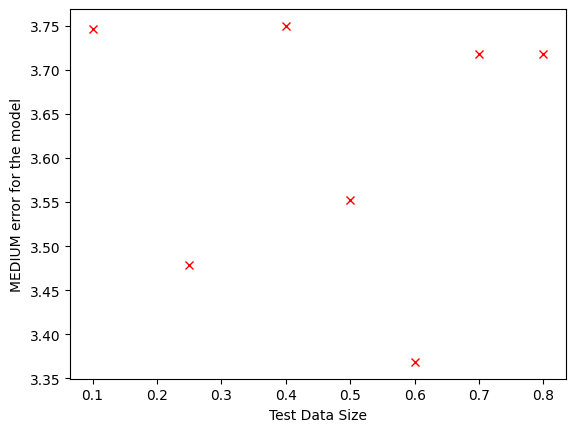

In [99]:
plt.plot(data_set,med,'rx')
plt.xlabel("Test Data Size")
plt.ylabel("MEDIUM error for the model");

In [105]:
X_cls = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','Side','pred mort','LOS','LOSbin']]
X_cls = X_cls.dropna(axis=0)
X_cls.shape

(222, 16)

In [106]:
X_los = X_cls[['LOS']]
X_losbin = X_cls[['LOSbin']]

In [107]:
losx_train, losx_test, losy_train, losy_test = train_test_split(X_los, X_losbin, random_state=1)

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [112]:
losy_train = np.array(losy_train).reshape(-1)

In [113]:
logreg.fit(losx_train,losy_train)

LogisticRegression()

In [114]:
predict_losbin = logreg.predict(losx_test)

In [116]:
expected = np.array(losy_test).reshape(-1)

In [132]:
logreg.score(losx_test,losy_test)

1.0

In [134]:
new_los = np.array([[15.0],[20.0],[7.0],[5.0],[19.0]])

In [135]:
predictnew = logreg.predict(new_los)

/Users/beckhol/m3/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [133]:
predictnew

array([1., 1., 0., 0., 1.])

In [136]:
losx1_train, losx1_test, losy1_train, losy1_test = train_test_split(X_los, X_losbin, test_size=0.5,random_state=1)

In [139]:
logreg1 = LogisticRegression()
losy1_train = np.array(losy1_train).reshape(-1)
logreg1.fit(losx1_train,losy1_train)
logreg.score(losx1_test,losy1_test)

1.0

In [140]:
X_los

,LOS
0,1.0
1,13.0
2,8.0
3,4.0
4,8.0
...,...
245,6.0
246,4.0
247,4.0
248,4.0


In [143]:
X_bin = X_cls[['LOS','LOSbin']]

In [144]:
X_bin

,LOS,LOSbin
0,1.0,0.0
1,13.0,1.0
2,8.0,1.0
3,4.0,0.0
4,8.0,1.0
...,...,...
245,6.0,0.0
246,4.0,0.0
247,4.0,0.0
248,4.0,0.0


In [174]:
X_bin.loc[X_bin.LOS>=5,'LOSbin'] = 1.0
X_bin.apply(pd.to_numeric)

,LOS,LOSbin
0,1.0,0.0
1,13.0,1.0
2,8.0,1.0
3,4.0,0.0
4,8.0,1.0
...,...,...
245,6.0,1.0
246,4.0,0.0
247,4.0,0.0
248,4.0,0.0


In [179]:
X_bin[['LOSbin']] = X_bin[['LOSbin']].astype(float)

/var/folders/dy/m2gf74c10bl6jpj8gtvyh8bw0000gn/T/ipykernel_63091/211801834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bin[['LOSbin']] = X_bin[['LOSbin']].astype(float)


In [182]:
X_los2 = X_bin[['LOS']]
X_losbin2 = X_bin[['LOSbin']]

In [183]:
losx2_train, losx2_test, losy2_train, losy2_test = train_test_split(X_los2, X_losbin2, random_state=1)

In [184]:
logreg3 = LogisticRegression()

In [185]:
losy2_train = np.array(losy2_train).reshape(-1)

In [187]:
logreg3.fit(losx2_train,losy2_train)

LogisticRegression()

In [188]:
logreg3.score(losx2_test,losy2_test)

1.0

In [189]:
new_los1 = np.array([[4.0],[1.0],[7.0],[5.0],[20.0]])

In [190]:
logreg3.predict(new_los1)

/Users/beckhol/m3/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0., 0., 1., 1., 1.])